In [1]:
#check_results.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of unperturbed particles having 1e-6 < e < 1e-2 particles for 2e4 orbits
#and show that the fractional variations in a and e are tiny

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')

In [8]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

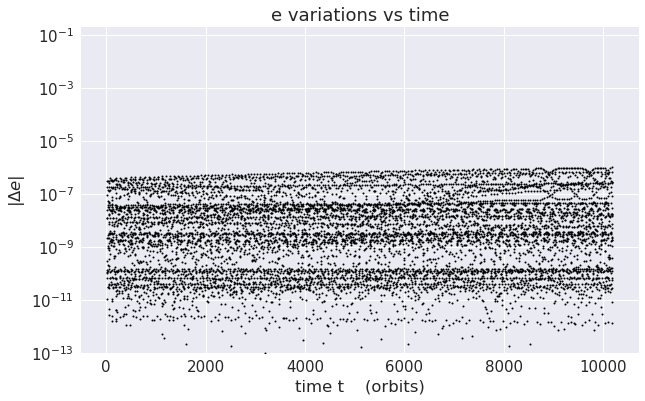

In [9]:
#plot de vs time
f, ax = plt.subplots(figsize=(10, 6))
for tm in range(len(times)):
    de = np.abs(e[tm] - e[0])
    time = np.zeros_like(de) + times[tm]/(2.0*np.pi)
    p = sns.regplot(time, de, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's':4}, marker='o', color='black')
ax.set_yscale('log')
#ax.set_xlim(0, 1.0e4)
ax.set_ylim(1.0e-13, 2.0e-1)
ax.set_title('e variations vs time')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$|\Delta e|$')

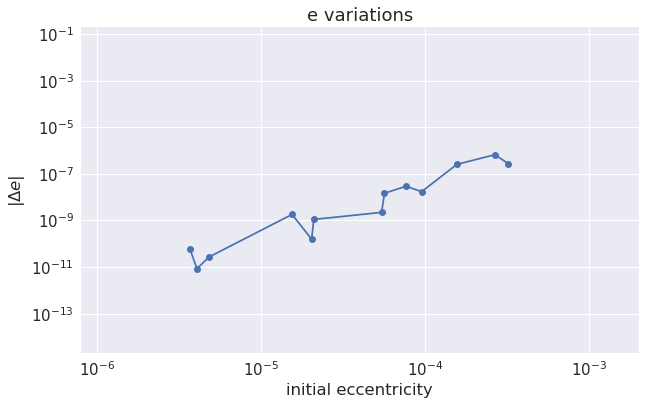

In [10]:
#plot final |de| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(e[-1] - e[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-3)
ax.set_ylim(2.0e-15, 2.0e-1)
ax.set_title('e variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta e|$')

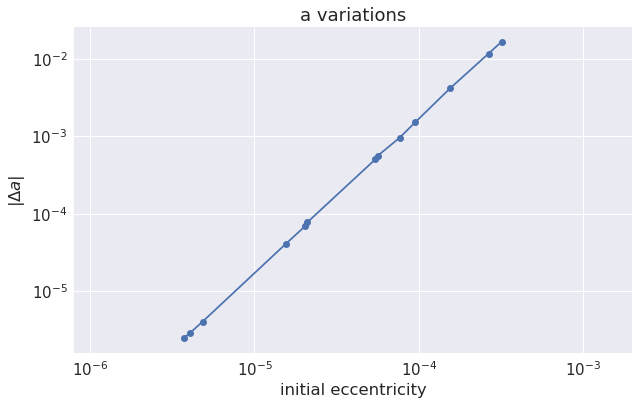

In [11]:
#plot final |da| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(a[-1] - a[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-3)
#ax.set_ylim(2.0e-11, 2.0e0)
ax.set_title('a variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta a|$')

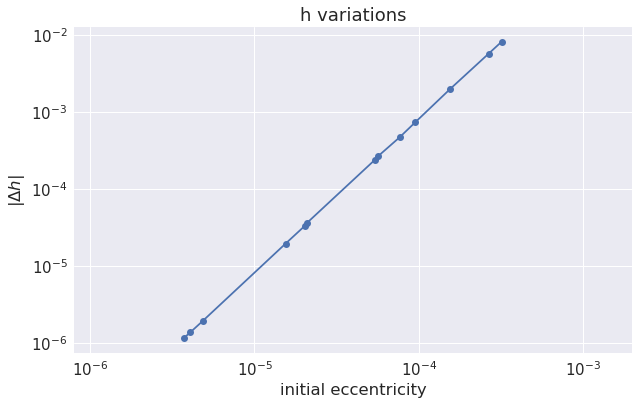

In [12]:
#plot final |dh| versus initial e
h = r*vt
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(h[-1] - h[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-3)
#ax.set_ylim(2.0e-9, 2.0e0)
ax.set_title('h variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta h|$')